# Annual

# Make Sure the modules are installed



# Import modules

In [191]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [192]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


# produce viz of annual total 2009-2016
because I'm using SQL type queery with count(*), this responds faster

## api call for count of all by year

In [193]:
url = 'https://data.sfgov.org/resource/qer8-n8u9.csv?$select=date_trunc_y(opened)as%20year,%20count(*)&$order=year&$group=year'

In [194]:
df = pd.read_csv(url)
df = df[1:-1]
df

,year,count
1,01/01/2009 12:00:00 AM,32285
2,01/01/2010 12:00:00 AM,26769
3,01/01/2011 12:00:00 AM,25445
4,01/01/2012 12:00:00 AM,26254
5,01/01/2013 12:00:00 AM,35831
6,01/01/2014 12:00:00 AM,46808
7,01/01/2015 12:00:00 AM,57249
8,01/01/2016 12:00:00 AM,72392


In [195]:
df['year'].str.extract('(?P<year>\d{4})').astype(int)


/home/gdillon/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


1    2009
2    2010
3    2011
4    2012
5    2013
6    2014
7    2015
8    2016
Name: year, dtype: int64

In [196]:
df['year']=df['year'].str.extract('(?P<year>\d{4})').astype(str)
df['count']=df['count'].astype(int)
df

/home/gdillon/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,year,count
1,2009,32285
2,2010,26769
3,2011,25445
4,2012,26254
5,2013,35831
6,2014,46808
7,2015,57249
8,2016,72392


In [197]:
from bokeh.charts import Bar, output_file, output_notebook
from bokeh.layouts import row
output_notebook()

Loading BokehJS ...

In [ ]:
trend = Bar(df, values = 'count', label = 'year', title = 'Graffiti reported to SF311 by year')
show(row(trend))

In [92]:
df = df[3:-1]
df

,year,count
7,2015,57249
8,2016,72392


In [93]:
trend = Bar(df, values = 'count', label = 'year')
show(row(trend))

# Analysis by Source, grab new dataframe by constructing SQL query to API

In [109]:
url = 'https://data.sfgov.org/resource/qer8-n8u9.csv?$select=source,date_trunc_y(opened)as%20year,%20count(*)&$order=year&$group=year,source'

In [110]:
print(url)

https://data.sfgov.org/resource/qer8-n8u9.csv?$select=source,date_trunc_y(opened)as%20year,%20count(*)&$order=year&$group=year,source


In [113]:
df=pd.read_csv(url)
df=df[18:]
df['year']=df['year'].str.extract('(?P<year>\d{4})').astype(str)
df['count']=df['count'].astype(int)
df=df[:-1]

/home/gdillon/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [115]:
df2 =    pd.pivot_table(df, 
                        values=['count'],
                        index=['year'],
                        columns=['Source'],
                        aggfunc=np.sum,
                        fill_value=0)
df2=df2.drop(df2.columns[[2]], axis=1)
df2

count                                          
Source Integrated Agency Open311 Twitter Voice In Web Self Service
year                                                              
2013                9666    4030    1512     9293            11330
2014                5493   19813    2227     7501            11769
2015                8530   38732     202     5636             4143
2016                7992   55148     194     4390             4668

example code from stackoverflow http://stackoverflow.com/questions/31520951/plotting-multiple-lines-with-bokeh-and-pandas

In [119]:
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, show, output_file


numlines=len(df2.columns)
mypalette=Spectral11[0:numlines]

p = figure(width=500, height=300, x_axis_type="datetime") 
p.multi_line(xs=[df2.index.values]*numlines,
                ys=[df2[name].values for name in df2],
                line_color=mypalette,
                line_width=5)
output_notebook()
show(p)

Loading BokehJS ...

# The above graph needs labels for years and what the line represent.   But it shows that all the growth in reports is coming from the mobile app.

# Grab url and begin pulling year of data

In [128]:
url = 'https://data.sfgov.org/resource/rme2-xgvs.json'
url = url[:-4]+'csv'
url

'https://data.sfgov.org/resource/rme2-xgvs.csv'

# Growth in reports (2013 to 2016)

### Code for dealing with Socrata limit of 50,000 api limit

In [129]:

limit = '?$limit=50000'
offset = '&$offset=50000'
url1 = url+limit
print (url1)

url2 = url1 + offset
print (url2)

https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000
https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000&$offset=50000


In [130]:
# drop from url those prior to January 1
where = '&$where='
category = 'opened'
start = '>='

#date format 'year-mm-dd'
onorafter = "'2016-01-01'"
url2 = url2 + where + category + start + str(onorafter) 
print(url2)

https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000&$offset=50000&$where=opened>='2016-01-01'


# Concatenate or Vertically stack the two dataFrames

In [131]:
df1  = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df = pd.concat([df1,df2])
df.shape


(72392, 16)

In [132]:
# frames = [df1,df2]
# df = pd.concat(frames)

# Convert the time series into pandas time version

In [133]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [134]:
type(df.Opened)

pandas.core.series.Series

In [135]:
df['Opened'] = pd.to_datetime(df['Opened'])



In [136]:
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])


In [137]:
df['Opened'].head(2)

0   2016-12-31 23:39:52
1   2016-12-31 23:39:09
Name: Opened, dtype: datetime64[ns]

In [138]:
df['Diff'] =(df.Closed-df.Opened).astype('timedelta64[D]')

In [187]:
type(df['Supervisor District'])

pandas.core.series.Series

In [190]:
type(df['Supervisor District']).astype('int')

TypeError: astype() missing 1 required positional argument: 'dtype'

In [139]:
df.Diff.describe()

count    61079.000000
mean        15.359109
std         32.055670
min         -1.000000
25%          0.000000
50%          4.000000
75%         17.000000
max        348.000000
Name: Diff, dtype: float64

In [140]:
df[df['Neighborhood' ]== "Mission"].head(85)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL,Diff
59,6678507,2016-12-31 14:03:07,NaT,2016-12-31 14:03:07,Open,Open,Clear Channel - Transit Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Transit_Shelter_Platform - Not_Offensive,"3490 18TH ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.761845884718, -122.421381526681)",Open311,http://mobile311.sfgov.org/media/san_francisco...,NaN
60,6678506,2016-12-31 14:01:15,NaT,2016-12-31 20:32:49,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"1855 FOLSOM ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.767442202896, -122.413937389764)",Open311,http://mobile311.sfgov.org/media/san_francisco...,NaN
61,6678496,2016-12-31 13:49:21,NaT,2016-12-31 13:49:21,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 19TH ST and SAN CARLOS ST,9.0,Mission,"(37.7601888876742, -122.419974854088)",Open311,http://mobile311.sfgov.org/media/san_francisco...,NaN
62,6678495,2016-12-31 13:48:37,NaT,2016-12-31 13:48:37,Open,Open,US Postal Service Maintenance Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Mail_box - Not_Offensive,Intersection of 19TH ST and LEXINGTON ST,9.0,Mission,"(37.7601475157402, -122.420659554429)",Open311,http://mobile311.sfgov.org/media/san_francisco...,NaN
63,6678494,2016-12-31 13:48:00,NaT,2016-12-31 13:48:00,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,Intersection of 19TH ST and LEXINGTON ST,9.0,Mission,"(37.7601475157402, -122.420659554429)",Open311,http://mobile311.sfgov.org/media/san_francisco...,NaN
64,6678489,2016-12-31 13:46:49,NaT,2016-12-31 13:59:05,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,Intersection of 19TH ST and VALENCIA ST,8.0,Mission,"(37.7601012510183, -122.421425091251)",Open311,http://mobile311.sfgov.org/media/san_francisco...,NaN
89,6678213,2016-12-31 11:41:15,NaT,2016-12-31 11:41:15,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Sidewalk_in_front_of_property - Not_Offensive,Intersection of 18TH ST and VALENCIA ST,9.0,Mission,"(37.7617007549058, -122.421578568646)",Open311,http://mobile311.sfgov.org/media/san_francisco...,NaN
90,6678077,2016-12-31 10:39:45,NaT,2016-12-31 10:39:45,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Fire_Police_Callbox - Not_Offensive,Intersection of 16TH ST and MISSION ST,9.0,Mission,"(37.7650512510466, -122.419669041689)",Open311,http://mobile311.sfgov.org/media/san_francisco...,NaN
91,6678053,2016-12-31 10:29:42,2016-12-31 11:25:21,2016-12-31 11:25:21,Closed,Case Resolved -,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,City_receptacle - Not_Offensive,Intersection of 24TH ST and MISSION ST,9.0,Mission,"(37.7522394710724, -122.418445426677)",Open311,http://mobile311.sfgov.org/media/san_francisco...,0.0
92,6678049,2016-12-31 10:28:45,NaT,2016-12-31 10:29:27,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Pole - Offensive,Intersection of 24TH ST and MISSION ST,9.0,Mission,"(37.7522394710724, -122.418445426677)",Open311,http://mobile311.sfgov.org/media/san_francisco...,NaN


In [141]:
df[df['Neighborhood' ]== "Mission"].describe()

,CaseID,Supervisor District,Diff
count,1.286600e+04,12866.000000,11079.000000
mean,5.987222e+06,8.984611,14.859915
std,3.862008e+05,0.267846,30.506770
min,5.421825e+06,6.000000,0.000000
25%,5.648125e+06,9.000000,0.000000
50%,5.943023e+06,9.000000,4.000000
75%,6.315516e+06,9.000000,15.000000
max,6.678507e+06,10.000000,346.000000


In [142]:
df['Responsible Agency'].value_counts()[:6]

DPW Ops Queue                          47863
US Postal Service Maintenance Queue     5277
Clear Channel - Transit Queue           3962
DPT Meter_Bike Queue                    3135
311 Service Request Queue - Hold        2266
DPW BSM Queue                           2173
Name: Responsible Agency, dtype: int64

In [143]:
df[df['Responsible Agency'] == 'US Postal Service Maintenance Queue']['Diff'].describe()

count    3621.000000
mean       21.472798
std        20.026409
min         0.000000
25%        10.000000
50%        15.000000
75%        26.000000
max       119.000000
Name: Diff, dtype: float64

In [144]:
df[df['Responsible Agency'] == 'Clear Channel - Transit Queue']['Diff'].describe()

count    3914.000000
mean        1.669136
std         4.863339
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       157.000000
Name: Diff, dtype: float64

In [145]:
df[df['Responsible Agency'] == 'DPW Ops Queue']['Diff'].describe()

count    39746.000000
mean        13.476501
std         26.017925
min         -1.000000
25%          0.000000
50%          3.000000
75%         17.000000
max        279.000000
Name: Diff, dtype: float64

In [146]:
df[df['Category'] == 'Graffiti Private Property']['Diff'].describe()

count    21006.000000
mean        18.711844
std         32.273863
min         -1.000000
25%          1.000000
50%          5.000000
75%         33.000000
max        333.000000
Name: Diff, dtype: float64

In [147]:
df[df['Category'] == 'Graffiti Public Property']['Diff'].describe()

count    40073.000000
mean        13.601627
std         31.800200
min          0.000000
25%          0.000000
50%          3.000000
75%         12.000000
max        348.000000
Name: Diff, dtype: float64

In [148]:
df['Source'].value_counts()

Open311              55148
Integrated Agency     7992
Web Self Service      4668
Voice In              4390
Twitter                194
Name: Source, dtype: int64

In [149]:
df[df['Source'] == 'Open311']['Diff'].describe()

count    49730.000000
mean        14.198009
std         30.651944
min          0.000000
25%          0.000000
50%          3.000000
75%         14.000000
max        348.000000
Name: Diff, dtype: float64

In [150]:
df[df['Source'] == 'Voice In']['Diff'].describe()

count    3915.000000
mean       12.373436
std        22.711359
min         0.000000
25%         0.000000
50%         3.000000
75%        14.000000
max       315.000000
Name: Diff, dtype: float64

In [151]:
df[df['Source'] == 'Integrated Agency']['Diff'].describe()

count    3282.000000
mean       39.164229
std        52.935707
min        -1.000000
25%        17.000000
50%        36.000000
75%        36.000000
max       277.000000
Name: Diff, dtype: float64

# Consider some exploratory statistics / reality checks

In [152]:
source = df.Source.value_counts()
print(type(source))


print(source)

<class 'pandas.core.series.Series'>
Open311              55148
Integrated Agency     7992
Web Self Service      4668
Voice In              4390
Twitter                194
Name: Source, dtype: int64


In [153]:
type(source)

pandas.core.series.Series

In [154]:
label_list = source.index.tolist()
print(label_list)

['Open311', 'Integrated Agency', 'Web Self Service', 'Voice In', 'Twitter']


In [155]:
source = source.tolist()
source


[55148, 7992, 4668, 4390, 194]

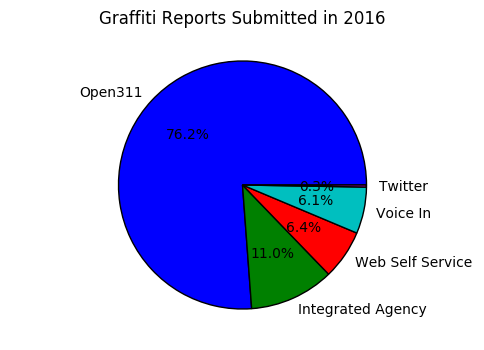

In [156]:


plt.axis("equal")
plt.pie(
        source,
        labels=label_list,
        autopct="%1.1f%%"
        )
plt.title("Graffiti Reports Submitted in 2016")
plt.show()

In [179]:
sups = df['Supervisor District'].value_counts().head(11)

In [181]:
top = 

9.0     13981
5.0     11913
3.0     11836
6.0      9701
8.0      8755
1.0      4644
10.0     3938
2.0      2345
11.0     1850
4.0      1345
7.0      1297
Name: Supervisor District, dtype: int64

# Get list of Supervisor's'

In [160]:
df['Status Notes'].value_counts().head(10)

Case Resolved -                                                               11085
accepted                                                                       7742
Scheduled -                                                                    3999
Open                                                                           2203
Case Transferred - Per process - cases are closed 5 days after assignment.     2153
Case Resolved - meter shop has closed this request                             1930
Case is a Duplicate -                                                          1415
Case Resolved - Graffiti removed                                               1221
Case Completed - resolved:                                                     1128
Case Completed - Case Resolved:                                                 863
Name: Status Notes, dtype: int64

In [161]:
df['Status'].value_counts().head()

Closed    61079
Open      11313
Name: Status, dtype: int64

In [167]:
df['Responsible Agency'].value_counts().head(8)

DPW Ops Queue                          47863
US Postal Service Maintenance Queue     5277
Clear Channel - Transit Queue           3962
DPT Meter_Bike Queue                    3135
311 Service Request Queue - Hold        2266
DPW BSM Queue                           2173
PUC - Water - G                         1782
311 Supervisor Queue                    1634
Name: Responsible Agency, dtype: int64

In [163]:
df.Category.value_counts().head()

Graffiti Public Property     44646
Graffiti Private Property    27746
Name: Category, dtype: int64

In [164]:
df['Request Type'].value_counts().head(10)

Not_Offensive Graffiti on Public Property                 26135
Not_Offensive Graffiti on Private Property                22146
Offensive Graffiti on Public Property                     18087
Offensive Graffiti on Private Property                     5513
offensive Graffiti on Public Property                       424
Post_Abatement_Inspection Graffiti on Private Property       87
Name: Request Type, dtype: int64

In [165]:
df['Request Details'].value_counts().head(20)

Building_other - Not_Offensive                      8654
Building_commercial - Not_Offensive                 7553
Other_enter_additional_details_below - Offensive    7056
Pole - Not_Offensive                                5532
Sidewalk_in_front_of_property - Not_Offensive       3703
Signal_box - Not_Offensive                          3641
Mail_box - Not_Offensive                            3389
Transit_Shelter_Platform - Not_Offensive            3133
Pole - Offensive                                    2778
Parking_meter - Not_Offensive                       2567
Building_commercial - Offensive                     2479
Building_residential - Not_Offensive                2236
Sidewalk_in_front_of_property - Offensive           1648
Mail_box - Offensive                                1620
Signal_box - Offensive                              1524
Fire_hydrant - Not_Offensive                        1425
News_rack - Not_Offensive                           1339
Sidewalk_structure - Not_Offens

In [ ]:
df['Address'].value_counts().head(20)

In [ ]:
df['Source'].value_counts().head(6)

In [ ]:
df['Media URL'].describe()

In [ ]:
df['Point'].describe()

# Plot this.    Simple First


In [ ]:
#Plot by top responsible agency that is not DPW

In [ ]:
!pwd

In [ ]:
!ls

In [ ]:
!cat geocoded.csv

# Start Plotting the simple items

# Plot Responsible Agency non DPW

In [ ]:
respAgencyCount = df['Responsible Agency'].value_counts()

In [ ]:
respAgencyCount = respAgencyCount[1:27]

In [ ]:
respAgencyCount

## minimally acceptable is to do pie / dpw vs all other
### DPW share compared to prior years
### Conclude, DPW doing a good job, how about the other departments
### Bar Chart the top 5-6
### Which of the top 5-6 are doing better.
### can't give the most natural statistic, because 